In [4]:
"""
==================================
Create a PPI plot on a cartopy map
==================================

An example which creates a PPI plot of a file with a cartopy background
and range rings

"""

print(__doc__)

#Author: 
#License


Create a PPI plot on a cartopy map

An example which creates a PPI plot of a file with a cartopy background
and range rings




In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyart

In [3]:
# Read in the file, create a RadarMapDisplayBasemap object
filename = 'nsaxsaprppiC1.a1.20140201.184802.nc'
radar = pyart.io.read(filename)
display = pyart.graph.RadarMapDisplay(radar)

In [24]:
# Setting axes projection
crs = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0], 
                            central_longitude=radar.longitude['data'][0])

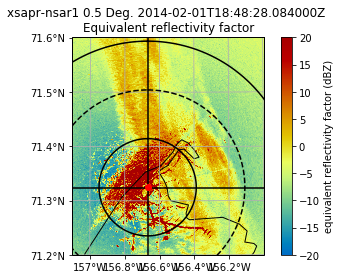

In [35]:
# Plot the second tilt
ax = plt.axes(projection=crs)
display.plot_ppi_map('reflectivity_horizontal', 1, vmin=-20, vmax=20, 
                     min_lon=-157.1, max_lon=-156, min_lat=71.2, max_lat=71.6, 
                     lon_lines=np.arange(-158, -154, .2), projection=crs, 
                     lat_lines=np.arange(69, 72, .1), resolution='10m',  
                     lat_0=radar.latitude['data'][0], 
                     lon_0=radar.longitude['data'][0])

# Plot range rings at 10, 20, 30, and 40km
display.plot_range_ring(10., line_style='k-')
display.plot_range_ring(20., line_style='k--')
display.plot_range_ring(30., line_style='k-')
display.plot_range_ring(40., line_style='k--')

# Plot cross hairs
display.plot_line_xy(np.array([-40000.0, 40000.0]), np.array([0.0, 0.0]), 
                    line_style='k-')
display.plot_line_xy(np.array([0.0, 0.0]), np.array([-20000.0, 200000.0]), 
                    line_style='k-')

# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0])

plt.show()